### 🛍️ Retail Customer Segmentation - Business Context & Objective

#### 📌 Business Context:
Perusahaan retail ingin memahami perilaku konsumen berdasarkan data transaksi yang telah terjadi. Dengan basis data ini, kita dapat mengelompokkan pelanggan berdasarkan kebiasaan belanja mereka, seperti seberapa sering mereka belanja, berapa banyak yang mereka belanjakan, dan kapan terakhir mereka bertransaksi.

#### 🎯 Objective:
- Melakukan segmentasi pelanggan menggunakan metode **RFM (Recency, Frequency, Monetary)**.
- Mengidentifikasi segmen-segmen penting seperti **Champions**, **Big Spenders**, **Loyal Customers**, dan lainnya.
- Melihat preferensi produk dan perilaku tiap segmen.
- Menyusun rekomendasi strategi marketing berdasarkan profil pelanggan.


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Retail_Transaction_Dataset.csv")

# Lihat 5 baris pertama
display(df.head(25))
# print(df.head())

# Info kolom & tipe data
print(df.info())

# Cek missing values
print(df.isnull().sum())

# Statistik ringkasan
print(df.describe(include='all'))


,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\r\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\r\nEast Kara, MT ...",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\r\nPort Lauraland, ...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\r\nLake Tammy, ...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\r\nHoland, VA 8...",Electronics,4.030096,626.030484
5,463050,D,3,54.093152,8/15/2023 4:24,Cash,"8492 Jonathan Drive\r\nNorth Robertshire, TN 6...",Electronics,10.888768,144.609223
6,888163,D,7,13.121937,12/26/2023 5:32,PayPal,USNV Harrell\r\nFPO AA 62814,Clothing,16.295127,76.885907
7,843385,A,8,56.025164,10/11/2023 6:48,Debit Card,"489 Juan Loop Apt. 093\r\nNorth Brettville, WV...",Home Decor,6.344306,419.766052
8,839609,B,5,23.857981,2/27/2024 11:13,Credit Card,528 Justin Expressway Apt. 336\r\nCabreraborou...,Electronics,18.703997,96.977925
9,184135,D,4,63.342777,11/5/2023 1:46,Debit Card,"189 Wright Mews\r\nMartinfurt, MO 75932",Books,7.640607,234.012018


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB
None
CustomerID            0
ProductID             0
Quantity              0
Price                 0
TransactionDate       0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAm

In [91]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

df['Year'] = df['TransactionDate'].dt.year
df['Month'] = df['TransactionDate'].dt.month
df['Day'] = df['TransactionDate'].dt.day
df['Weekday'] = df['TransactionDate'].dt.day_name()
df['Hour'] = df['TransactionDate'].dt.hour

df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("%", "")


In [92]:
print(df.columns)

Index(['CustomerID', 'ProductID', 'Quantity', 'Price', 'TransactionDate',
       'PaymentMethod', 'StoreLocation', 'ProductCategory', 'DiscountApplied',
       'TotalAmount', 'Year', 'Month', 'Day', 'Weekday', 'Hour'],
      dtype='object')


In [93]:
df['PriceAfterDiscount'] = df['Price'] * (1 - df['DiscountApplied']/100)
# df['revenue'] = df['price_after_discount'] * df['Quantity']


In [94]:
df.duplicated().sum()


0

Lets explore for more Insight!

In [95]:
top_products = df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).reset_index()
print(top_products.head(10))


  ProductID  Quantity
0         C    125978
1         D    125786
2         B    125070
3         A    124095


In [96]:
df['Revenue'] = df['Price'] * df['Quantity'] * (1 - df['DiscountApplied'] / 100)
top_revenue_products = df.groupby('ProductID')['Revenue'].sum().sort_values(ascending=False).reset_index()
print(top_revenue_products.head(10))


  ProductID       Revenue
0         C  6.243649e+06
1         D  6.242925e+06
2         B  6.208130e+06
3         A  6.138792e+06


In [97]:
sales_by_city = df.groupby('StoreLocation')['Revenue'].sum().sort_values(ascending=False).reset_index()
print(sales_by_city.head(10))


                                       StoreLocation     Revenue
0          693 Williams Pine\r\nRobertside, WI 23415  896.141242
1           8978 Angela Forge\r\nGrossfort, LA 99907  895.343955
2            0303 Keith Manor\r\nJuliaport, NY 08811  893.509454
3  797 Sanders Landing Apt. 719\r\nNorth Terry, N...  892.538546
4          8889 Carr Mission\r\nRonaldview, TN 69021  892.253248
5                          USNV Diaz\r\nFPO AA 22844  892.240154
6            9432 King Keys\r\nSchmidttown, MA 64018  890.821751
7     3180 Danielle Canyon\r\nMorrisonland, MA 50656  890.688556
8       35822 Andrews Trace\r\nLandrymouth, VI 18721  889.148765
9                         USNS Blake\r\nFPO AE 15466  888.417599


In [98]:
transactions_by_hour = df['Hour'].value_counts().sort_index()
print(transactions_by_hour)


Hour
0     4118
1     4247
2     4135
3     4147
4     4226
5     4198
6     4163
7     4231
8     4172
9     4238
10    4162
11    4180
12    4078
13    4130
14    4142
15    4052
16    4210
17    4186
18    4184
19    4283
20    4194
21    4188
22    4008
23    4128
Name: count, dtype: int64


In [99]:
payment_methods = df['PaymentMethod'].value_counts()
print(payment_methods)


PaymentMethod
PayPal         25067
Credit Card    25034
Cash           25008
Debit Card     24891
Name: count, dtype: int64


RFM (Recency, Frequency, Monetary)

In [100]:
import datetime as dt

snapshot_date = df['TransactionDate'].max() + dt.timedelta(days=1)
print(f"Snapshot date: {snapshot_date}")


Snapshot date: 2024-04-29 22:22:00


In [101]:
# Hitung Recency secara terpisah
recency_df = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (snapshot_date - x.max()).days
}).rename(columns={'TransactionDate': 'Recency'})

# Hitung Frequency dan Monetary
fm_df = df.groupby('CustomerID').agg({
    'TransactionDate': 'count',
    'Revenue': 'sum'
}).rename(columns={'TransactionDate': 'Frequency', 'Revenue': 'Monetary'})

# Gabungkan semuanya
rfm = recency_df.join(fm_df).reset_index()
print(rfm.head())


   CustomerID  Recency  Frequency    Monetary
0          14      267          1  256.232791
1          42      346          1  502.656523
2          49      329          1   21.399047
3          59       28          2  249.492696
4          65      316          1  548.006625


In [102]:
# Skor RFM (1 = terburuk, 5 = terbaik)
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Gabungkan menjadi satu skor
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)


In [103]:
# Lihat beberapa data
print(rfm.head())

# Lihat distribusi skor
rfm['RFM_Score'].value_counts().head(10)


   CustomerID  Recency  Frequency    Monetary  R  F  M RFM_Score
0          14      267          1  256.232791  2  1  3       213
1          42      346          1  502.656523  1  1  5       115
2          49      329          1   21.399047  1  1  1       111
3          59       28          2  249.492696  5  5  3       553
4          65      316          1  548.006625  1  1  5       115


RFM_Score
555    1492
455    1207
355    1053
554     934
123     843
342     840
214     840
454     838
241     834
124     830
Name: count, dtype: int64

In [104]:
# def rfm_segment(row):
#     if row['RFM_Score'] == '555':
#         return 'Champions'
#     elif row['R'] == '5' and row['F'] in ['4', '5']:
#         return 'Loyal Customers'
#     elif row['R'] == '5':
#         return 'Recent Customers'
#     elif row['F'] == '5':
#         return 'Frequent Buyers'
#     elif row['M'] == '5':
#         return 'Big Spenders'
#     elif row['R'] in ['3', '4'] and row['F'] in ['2', '3']:
#         return 'Potential Loyalists'
#     elif row['R'] in ['1', '2'] and row['F'] in ['4', '5']:
#         return 'At Risk'
#     elif row['R'] == '1' and row['F'] in ['1', '2']:
#         return 'Lost'
#     else:
#         return 'Others'

# # Terapkan ke dataframe
# rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

# # Lihat distribusi segmentasi
# print(rfm['Segment'].value_counts())

def rfm_segment_v2(row):
    r = int(row['R'])
    f = int(row['F'])
    m = int(row['M'])

    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 4 and f >= 3:
        return 'Loyal Customers'
    elif r >= 4:
        return 'Recent Customers'
    elif f >= 4:
        return 'Frequent Buyers'
    elif m >= 4:
        return 'Big Spenders'
    elif r <= 2 and f <= 2:
        return 'Lost'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(rfm_segment_v2, axis=1)
print(rfm['Segment'].value_counts())



Segment
Frequent Buyers     22083
Loyal Customers     16135
Recent Customers    14808
Big Spenders        13303
Others              11850
Lost                 9721
Champions            7315
Name: count, dtype: int64


In [105]:
# rfm.to_csv('rfm_segmented.csv', index=False)


In [106]:
# Gabungkan RFM segment ke dataset utama
df_segmented = df.merge(rfm[['CustomerID', 'Segment']], on='CustomerID', how='left')

# Hitung total quantity produk per segmen
popular_products = df_segmented.groupby(['Segment', 'ProductID'])['Quantity'].sum().reset_index()

# Ambil top 3 produk per segmen
top_products_per_segment = (
    popular_products.sort_values(['Segment', 'Quantity'], ascending=[True, False])
    .groupby('Segment')
    .head(3)
    .reset_index(drop=True)
)

print(top_products_per_segment)


             Segment ProductID  Quantity
0       Big Spenders         C     23267
1       Big Spenders         D     23071
2       Big Spenders         A     22970
3          Champions         D     15503
4          Champions         B     15147
5          Champions         A     15081
6    Frequent Buyers         B     30165
7    Frequent Buyers         C     29921
8    Frequent Buyers         D     29800
9               Lost         C      9610
10              Lost         A      9461
11              Lost         D      9248
12   Loyal Customers         B     18144
13   Loyal Customers         C     18054
14   Loyal Customers         A     17951
15            Others         C     11593
16            Others         D     11517
17            Others         B     11396
18  Recent Customers         D     18812
19  Recent Customers         C     18662
20  Recent Customers         A     18403


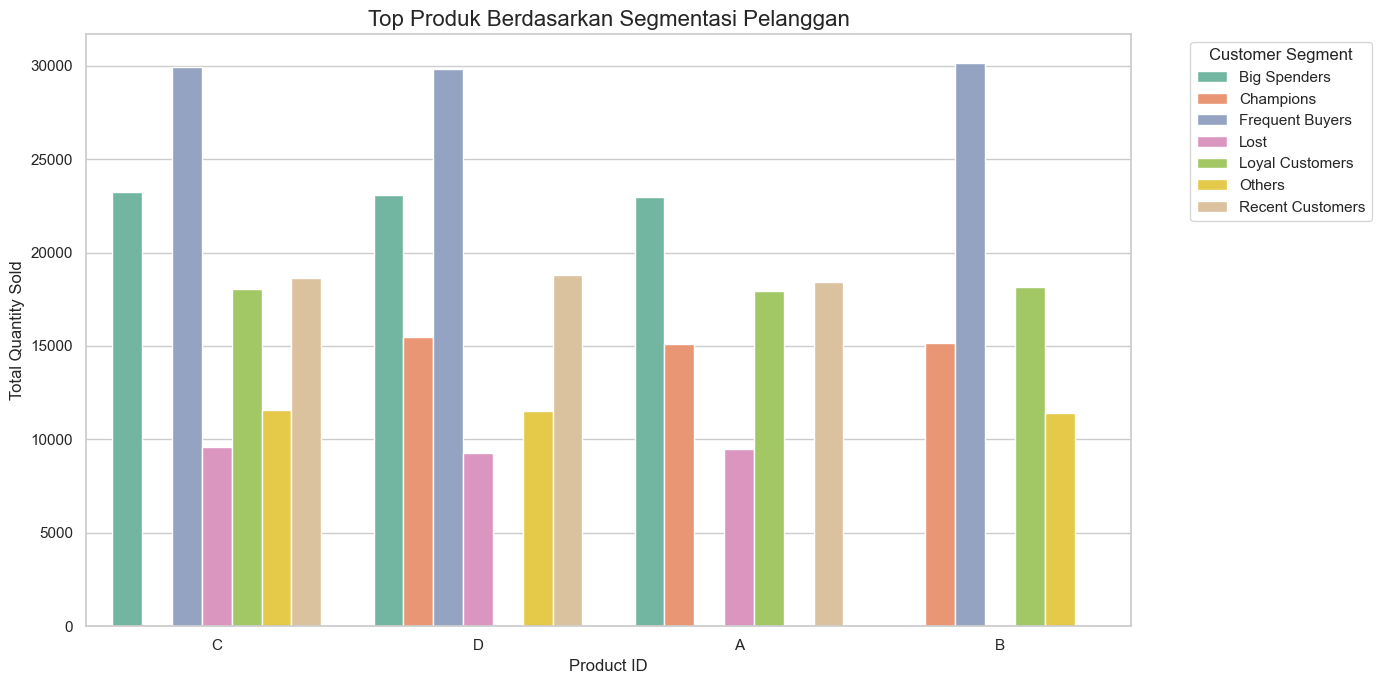

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style biar clean dan enak dilihat
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Plot barplot
sns.barplot(
    data=top_products_per_segment,
    x="ProductID",
    y="Quantity",
    hue="Segment",
    palette="Set2"
)

# Tambahin judul & label
plt.title("Top Produk Berdasarkan Segmentasi Pelanggan", fontsize=16)
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.legend(title="Customer Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


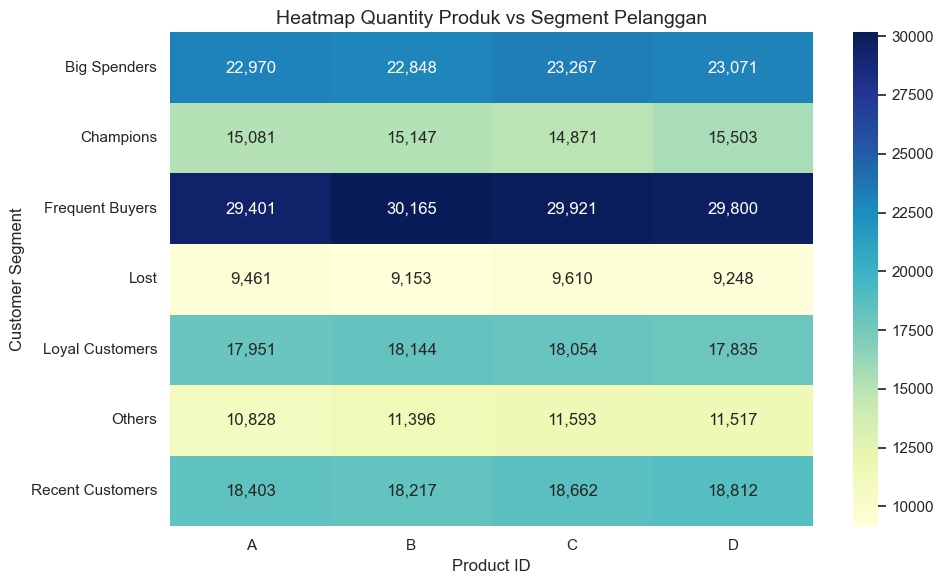

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat pivot table untuk heatmap
heatmap_data = df_segmented.groupby(['Segment', 'ProductID'])['Quantity'].sum().reset_index()
pivot_table = heatmap_data.pivot(index='Segment', columns='ProductID', values='Quantity')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=',.0f', cmap='YlGnBu')
plt.title('Heatmap Quantity Produk vs Segment Pelanggan', fontsize=14)
plt.xlabel('Product ID')
plt.ylabel('Customer Segment')
plt.tight_layout()
plt.show()


In [109]:

# rfm.to_csv('rfm_segmented.csv', index=False)

print(df_segmented.columns)
display(df_segmented)

df_segmented.to_csv('df_segmented.csv', index=False)

Index(['CustomerID', 'ProductID', 'Quantity', 'Price', 'TransactionDate',
       'PaymentMethod', 'StoreLocation', 'ProductCategory', 'DiscountApplied',
       'TotalAmount', 'Year', 'Month', 'Day', 'Weekday', 'Hour',
       'PriceAfterDiscount', 'Revenue', 'Segment'],
      dtype='object')


,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied,TotalAmount,Year,Month,Day,Weekday,Hour,PriceAfterDiscount,Revenue,Segment
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\r\nBaileyfort, HI 93354",Books,18.677100,455.862764,2023,12,26,Tuesday,12,65.123252,455.862764,Recent Customers
1,993229,C,4,75.195229,2023-08-05 00:00:00,Cash,"11635 William Well Suite 809\r\nEast Kara, MT ...",Home Decor,14.121365,258.306546,2023,8,5,Saturday,0,64.576637,258.306546,Frequent Buyers
2,579675,A,8,31.528816,2024-03-11 18:51:00,Cash,"910 Mendez Ville Suite 909\r\nPort Lauraland, ...",Books,15.943701,212.015651,2024,3,11,Monday,18,26.501956,212.015651,Loyal Customers
3,799826,D,5,98.880218,2023-10-27 22:00:00,PayPal,"87522 Sharon Corners Suite 500\r\nLake Tammy, ...",Books,6.686337,461.343769,2023,10,27,Friday,22,92.268754,461.343769,Frequent Buyers
4,121413,A,7,93.188512,2023-12-22 11:38:00,Cash,"0070 Michelle Island Suite 143\r\nHoland, VA 8...",Electronics,4.030096,626.030484,2023,12,22,Friday,11,89.432926,626.030484,Champions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,726461,A,2,56.078258,2023-07-17 16:59:00,Credit Card,"3632 Darren Station Apt. 553\r\nEricaborough, ...",Clothing,18.345145,91.581240,2023,7,17,Monday,16,45.790620,91.581240,Frequent Buyers
99996,328056,A,6,88.516406,2023-05-30 09:04:00,Credit Card,"821 Taylor Shoals\r\nEvansville, IL 70845",Electronics,3.995541,509.878179,2023,5,30,Tuesday,9,84.979697,509.878179,Big Spenders
99997,887304,B,4,72.385564,2023-08-25 07:59:00,Credit Card,"50653 Kara Lakes\r\nStephanieborough, RI 94492",Clothing,17.423979,239.092472,2023,8,25,Friday,7,59.773118,239.092472,Frequent Buyers
99998,326401,C,5,66.542239,2024-02-05 19:45:00,PayPal,"18756 Mcfarland Way Suite 866\r\nBarnettside, ...",Electronics,14.345018,284.983717,2024,2,5,Monday,19,56.996743,284.983717,Recent Customers
